In [636]:
from seaborn import load_dataset
import re
import pandas as pd  # Librerias para Dataset

# Librerias para Algoritmos de Machine learning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import precision_score, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

In [637]:
def draw_tree(X, y, tree: DecisionTreeClassifier):
    viz = dtreeviz(tree, X, y,
                   target_name="Class",
                   feature_names=[str(x) for x in range(X.shape[1])],
                   class_names=list(map(str, list(set(y)))))
    return viz

In [638]:
def get_clf_name(clf):
    return re.sub('[^A-Za-z0-9]+', '', str(clf.__class__).split('.')[-1])

In [639]:
def run_experiment(X_train, y_train, X_test, y_test, clf):
    #clf = clf.copy()  # Anado esta linea por el principio Open-close de desarrollo de software (pero no es necesario) 
    
    print(get_clf_name(clf))
    clf.fit(X_train, y_train)
    
    # training confusion matrix
    y_pred = clf.predict(X_train)
    cm = confusion_matrix(y_train, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    print("Accuracy Train: ", accuracy_score(y_train, y_pred))
    
    # test confusion matrix
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    print("Accuracy Test: ", accuracy_score(y_test, y_pred))
    return disp

In [640]:
# Pinguinos
# ==============================================================================
# DataSet 
print(sns.get_dataset_names()) # Datasets de Seaborn
df = load_dataset('penguins')
df_orignal = load_dataset('penguins')
df.head()

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [641]:
# Descripción de los campos

print('Cantidad de datos:',df.shape) # para saber Fil y Col del DataSet  344 filas y 7 columnas 

#Verifico el tipo de datos contenida en ambos dataset
print('Tipos de datos:', df.info()) 

# Species: la especie del pingüino. Esta sería la variable objetivo del modelo.
# Island: código de la isla dónde fue encontrado el pingüino. 
# bill_length_mm: largo del pico en milímetros.
# bill_depth_mm: profundidad del pico en milímetros.
# flipper_length_mm: largo de las aletas.
# body_mass_g: peso del pingüino en gramos.
# sex: género del pingüino


#Verifico si existen Nam
print('Verifico nulos v2',df.isnull().sum())


Cantidad de datos: (344, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
Tipos de datos: None
Verifico nulos v2 species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


Male      168
Female    165
Name: sex, dtype: int64

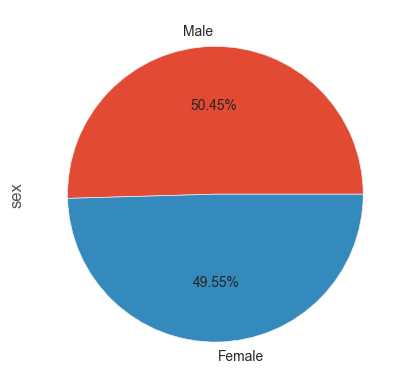

In [642]:


df.sex.value_counts().plot(kind='pie',autopct="%.2f%%")
df.sex.value_counts()


In [643]:
df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

Text(0.5, 1.0, 'Sex por Species')

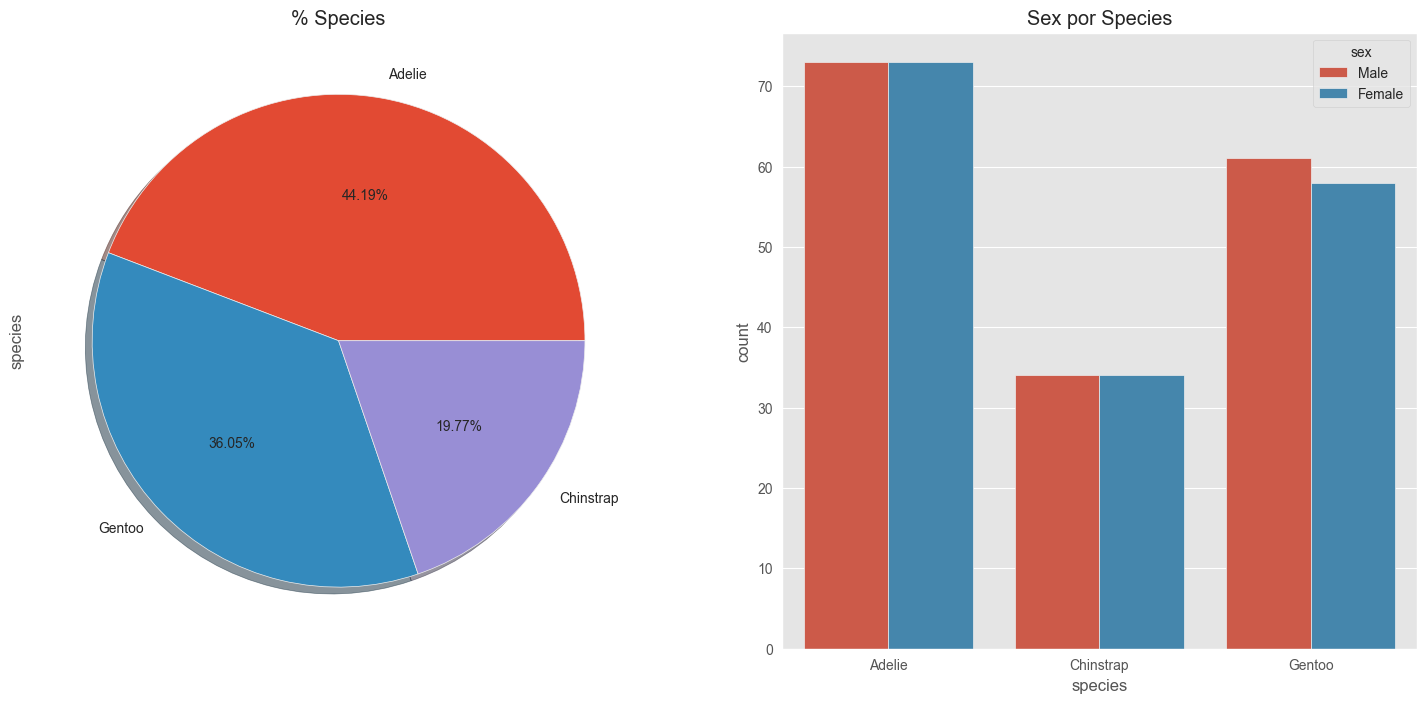

In [644]:
f , ax = plt.subplots (1,2, figsize = (18,8))

ax[0].set_title('% Species')
df.species.value_counts().plot.pie(autopct = '%.2f%%',ax = ax[0],shadow = True)

sns.countplot(x ='species',hue = 'sex', data =df, ax = ax[1])
ax[1].set_title('Sex por Species')



<AxesSubplot:title={'center':'Profundidad del pico por Especie y Sexo'}, xlabel='species', ylabel='bill_depth_mm'>

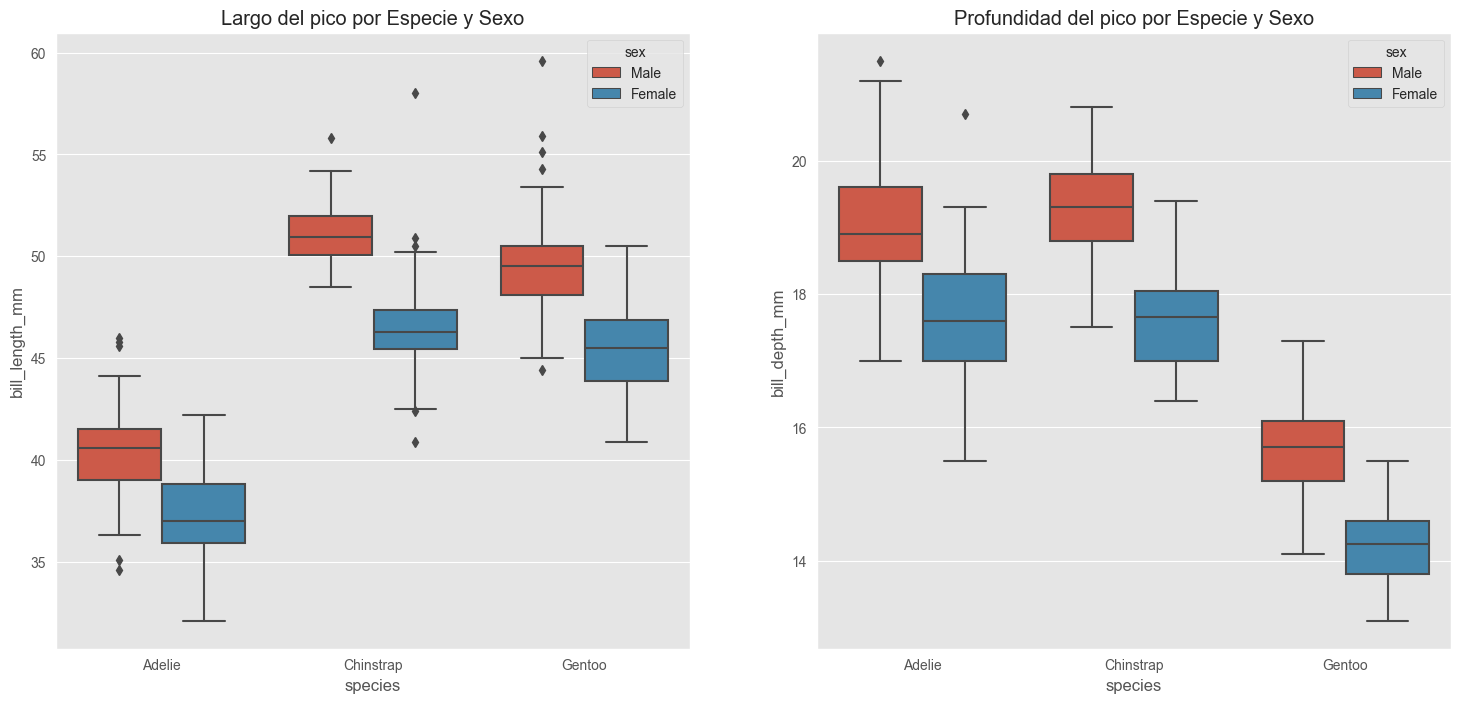

In [645]:
f , ax = plt.subplots (1,2, figsize = (18,8))
ax[0].set_title('Largo del pico por Especie y Sexo')
sns.boxplot(x=df.species,y=df.bill_length_mm,hue=df.sex,ax = ax[0])
ax[1].set_title('Profundidad del pico por Especie y Sexo')
sns.boxplot(x=df.species,y=df.bill_depth_mm ,hue=df.sex,ax = ax[1])


Text(0.5, 1.0, 'Sex por Islas')

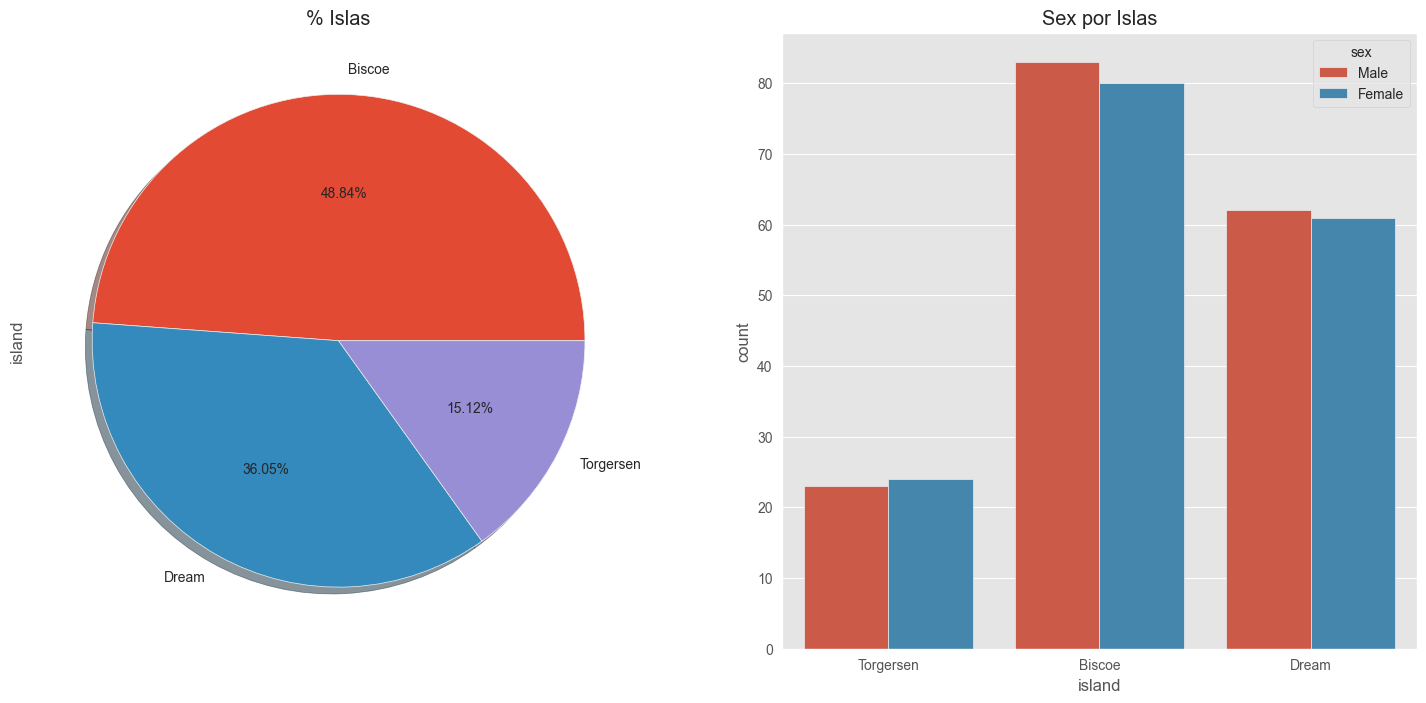

In [646]:
f , ax = plt.subplots (1,2, figsize = (18,8))

ax[0].set_title('% Islas')
df.island.value_counts().plot.pie(autopct = '%.2f%%',ax = ax[0],shadow = True)

sns.countplot(x ='island',hue = 'sex', data =df, ax = ax[1])
ax[1].set_title('Sex por Islas')


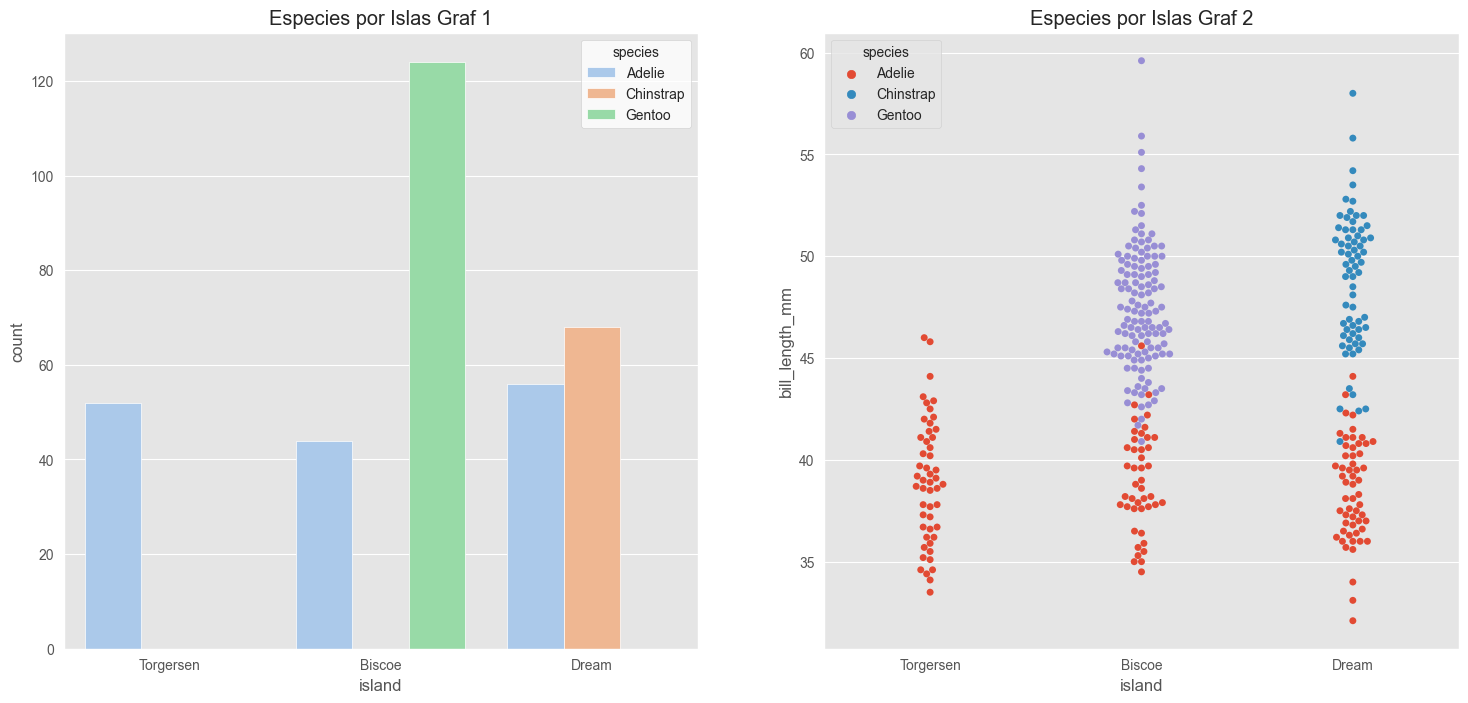

In [647]:
f , ax = plt.subplots (1,2, figsize = (18,8))
ax[0].set_title('Especies por Islas Graf 1' )
ax[1].set_title('Especies por Islas Graf 2' )

sns.swarmplot(x=df.island,y=df.bill_length_mm,hue=df.species)
with sns.axes_style('whitegrid'):

 sns.countplot(data=df, x='island', hue="species", palette="pastel",ax = ax[0])
 
 
# Podemos ver que: 
# La especie Adelie vive en las 3 islas 
# La especie Gembo solo vive en Biscoe
# La especie Chinstrap solo vive en Dream


<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

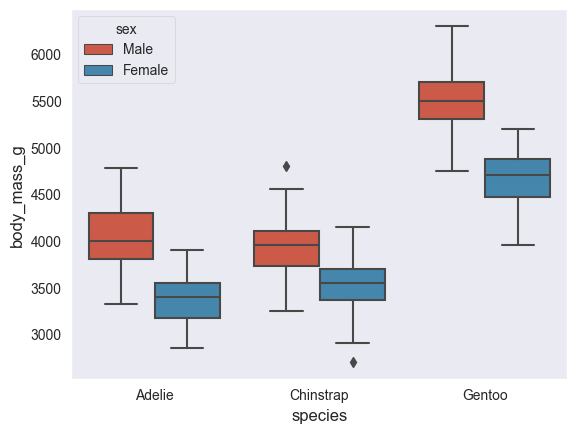

In [648]:


sns.set_style('dark')
sns.boxplot(x=df.species,y=df.body_mass_g,hue=df.sex)



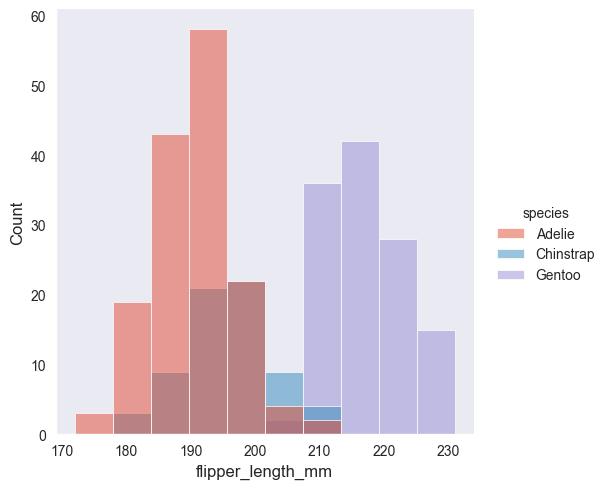

In [649]:
sns.displot(df, x="flipper_length_mm", hue="species");

In [650]:


correlation_matrix=df.corr()

correlation_matrix



,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


Text(0.5, 1.0, 'Bill Length vs Bill Depth')

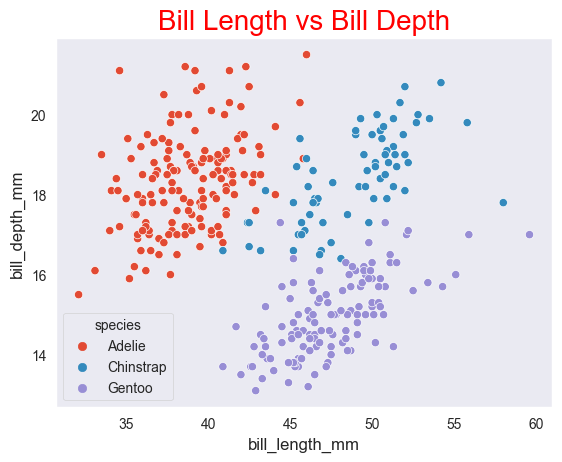

In [651]:
sns.scatterplot(x=df.bill_length_mm,y=df.bill_depth_mm,hue=df.species)

plt.title("Bill Length vs Bill Depth", size=20, color="red")




<AxesSubplot:>

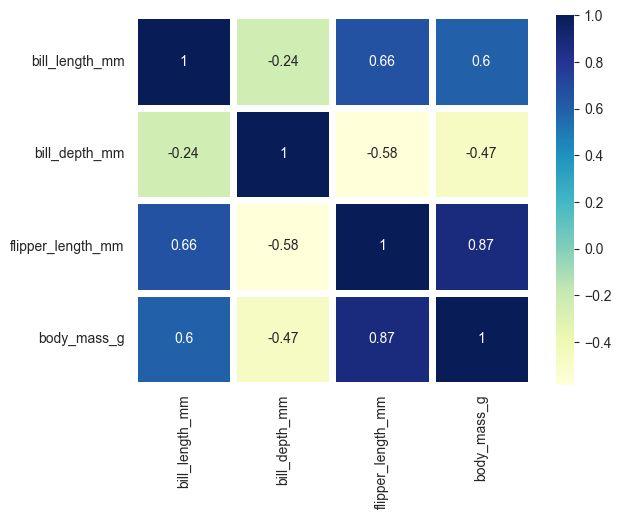

In [652]:


sns.set_style('dark')
sns.heatmap(correlation_matrix,annot=True,linecolor='white',linewidths=5,cmap="YlGnBu")



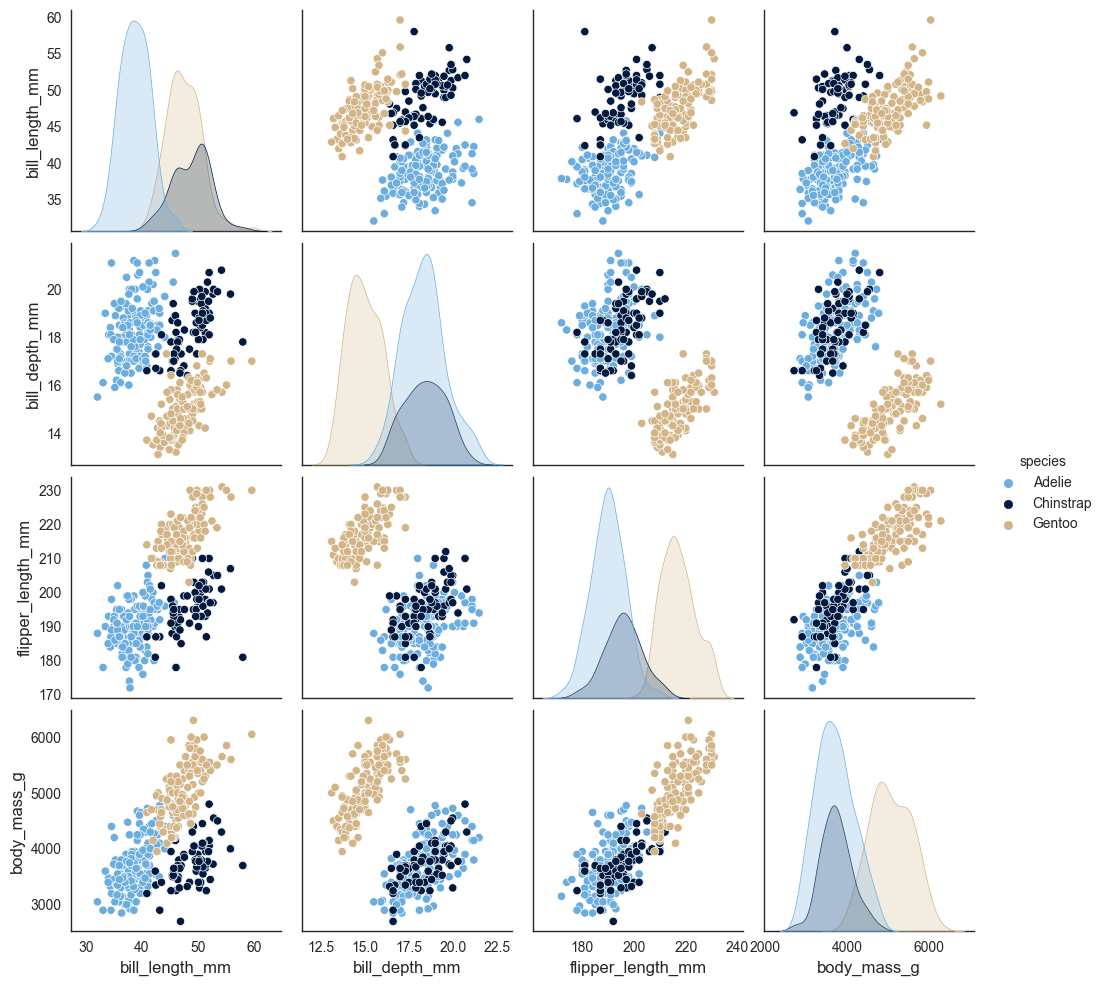

In [653]:
sns.set_style(style='white')
sns.pairplot(data=df,hue='species',palette=['#6baddf','#01193f','#d2b486'])

In [654]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [655]:
# Limpieza de Campos
# Se actualiza campos String a numeros
df.sex.replace(['Female','Male'],[0,1],inplace=True)
#df.species.replace(['Adelie','Gentoo','Chinstrap'],['0','1','2'],inplace=True)
mappings = {'Adelie':'1', 'Gentoo':'2','Chinstrap':'3'}
df.species = df.species.replace(mappings)
df.species = df.species.astype('int')
assert df.species.dtype == 'int'




# Creo el diccionario para etiquetar la isla de pinguino
mappings = {'Biscoe':'1', 'Dream':'2','Torgersen':'3'}
df.island = df.island.replace(mappings)
df.island = df.island.astype('int')
assert df.island.dtype == 'int'

print('Tipos de datos:', df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    int32  
 1   island             344 non-null    int32  
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    float64
dtypes: float64(5), int32(2)
memory usage: 16.2 KB
Tipos de datos: None


In [656]:

#Verifico si existen Nam
print('Verifico nulos v2',df.isnull().sum())

Verifico nulos v2 species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [657]:
print('Tipos de datos:', df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    int32  
 1   island             344 non-null    int32  
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    float64
dtypes: float64(5), int32(2)
memory usage: 16.2 KB
Tipos de datos: None


In [658]:
df.sex = df.sex.fillna('1')

#df.bill_length_mm = df.bill_length_mm.fillna(df.bill_length_mm.mean) 
#df.bill_depth_mm = df.bill_depth_mm.fillna(df.bill_depth_mm.mean) 
#df.flipper_length_mm = df.flipper_length_mm.fillna(df.flipper_length_mm.mean) 
#df.body_mass_g = df.body_mass_g.fillna(df.body_mass_g.mean) 
df.island = df['island'].astype('int64')
df.sex = df['sex'].astype('int64')

df = df.dropna()

#df.bill_length_mm = df.bill_length_mm.fillna(df.bill_length_mm.median()) 
#df.bill_depth_mm = df.bill_depth_mm.fillna(df.bill_depth_mm.mean) 
#df.flipper_length_mm = df.flipper_length_mm.fillna(df.flipper_length_mm.mean) 
#df.body_mass_g = df.body_mass_g.fillna(df.body_mass_g.mean) 

df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,3,39.1,18.7,181.0,3750.0,1
1,1,3,39.5,17.4,186.0,3800.0,0
2,1,3,40.3,18.0,195.0,3250.0,0
4,1,3,36.7,19.3,193.0,3450.0,0
5,1,3,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,2,1,47.2,13.7,214.0,4925.0,0
340,2,1,46.8,14.3,215.0,4850.0,0
341,2,1,50.4,15.7,222.0,5750.0,1
342,2,1,45.2,14.8,212.0,5200.0,0


In [659]:
#X = df.select_dtypes(include=['float64'])


X= df[['island', 'bill_length_mm', 'bill_depth_mm',
      'flipper_length_mm', 'body_mass_g', 'sex']]


y= df.species
print('Tipos de datos:', df.info()) 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    int32  
 1   island             342 non-null    int64  
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    int64  
dtypes: float64(4), int32(1), int64(2)
memory usage: 20.0 KB
Tipos de datos: None


Text(0.5, 1.0, ' Analisis de X (6 variables)')

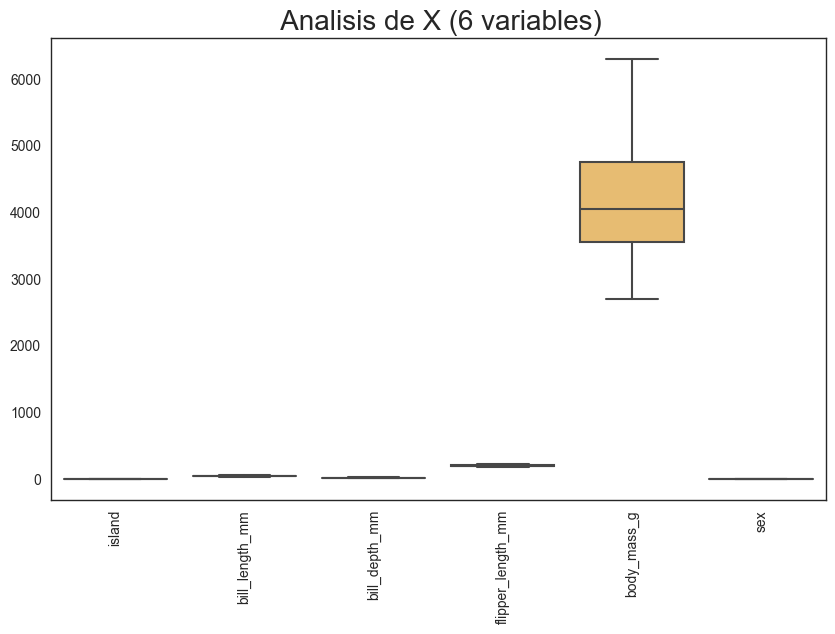

In [660]:
plt.figure(figsize=(10,6))
sns.boxplot(data=X)
plt.xticks(rotation = 90)
plt.title(" Analisis de X (6 variables)",fontsize=20)

In [661]:
# Al ser muchas variables con valores disparados preparamos los datos scalandolos para de alli poder usar pca 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled).describe()


,0,1,2,3,4,5
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,0.330409,0.429888,0.482282,0.490088,0.417154,0.517544
std,0.361910,0.198530,0.235094,0.238334,0.222765,0.500424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.259091,0.297619,0.305085,0.236111,0.000000
50%,0.500000,0.449091,0.500000,0.423729,0.375000,1.000000
75%,0.500000,0.596364,0.666667,0.694915,0.569444,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Analisis de X Scaled (6 variables)')

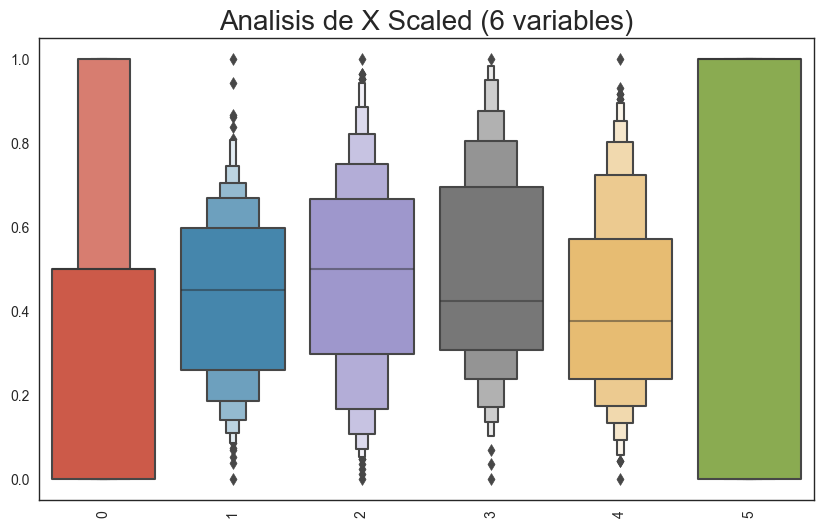

In [662]:
plt.figure(figsize=(10,6))
sns.boxenplot(data=X_scaled)
plt.xticks(rotation = 90)
plt.title("Analisis de X Scaled (6 variables)",fontsize=20)

In [663]:
# Usamos el PCA sobre los scalados
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [664]:
X_pca = pca.transform(X_scaled)

pca_df = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])

In [665]:
# Separando el modelo
#X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)



In [666]:
print(X_scaled.shape)
print(X_pca.shape)


(342, 6)
(342, 2)


Text(0.5, 1.0, 'Vista de Componentes X PCA (2 variables)')

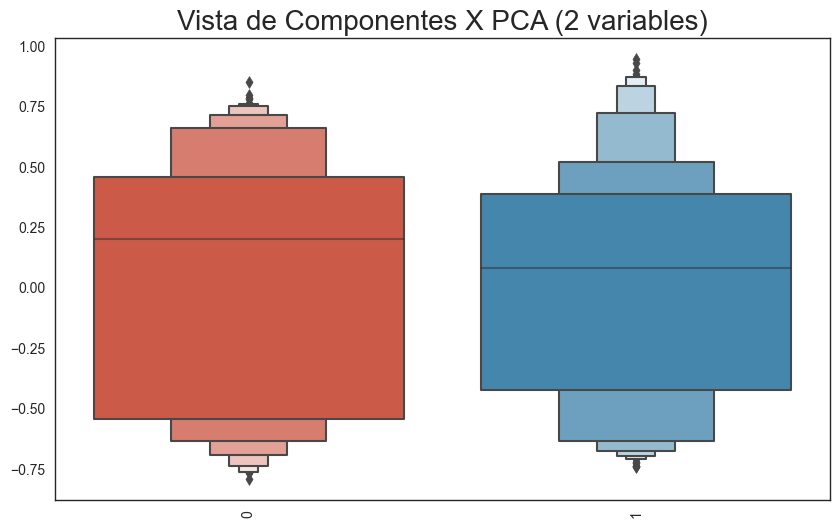

In [667]:
plt.figure(figsize=(10,6))
sns.boxenplot(data=X_pca)
plt.xticks(rotation = 90)
plt.title("Vista de Componentes X PCA (2 variables)",fontsize=20)

In [668]:
print('Tipos de datos:', df.info()) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    int32  
 1   island             342 non-null    int64  
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    int64  
dtypes: float64(4), int32(1), int64(2)
memory usage: 20.0 KB
Tipos de datos: None


In [669]:
# Separando el modelo
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [670]:

X_test_copy = X_test.copy()
y_test_copy = y_test.copy()


3


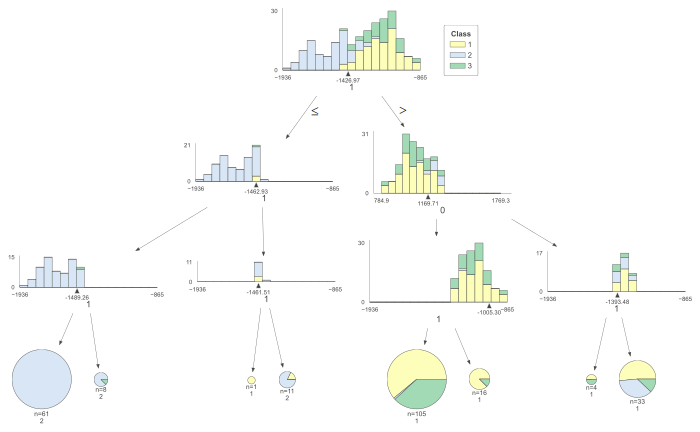

In [671]:
clf = DecisionTreeClassifier(max_depth=3)

clf.fit(pca.transform(X_train), y_train)
print(clf.get_depth())
viz = draw_tree(pca.transform(X_train), y_train, clf)
viz

DecisionTreeClassifier
Accuracy Train:  0.9832635983263598
Accuracy Test:  0.970873786407767


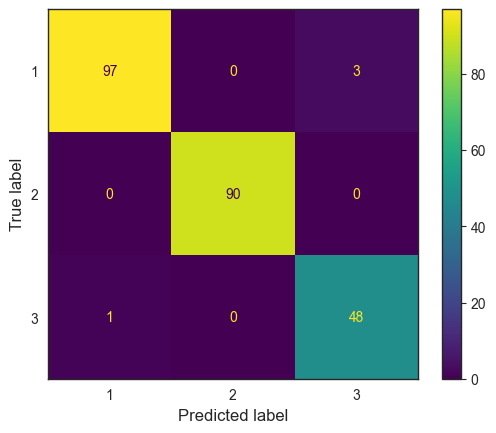

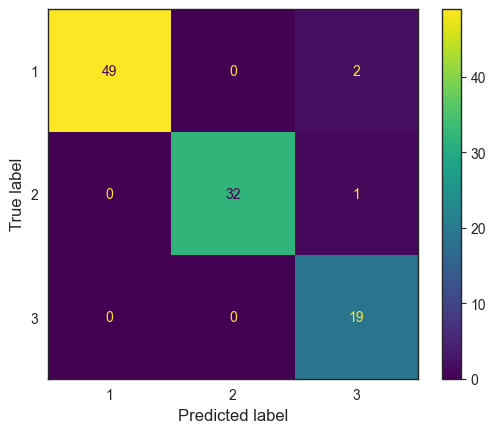

In [672]:
#MODELO 1 DecisionTreeClassifier
run_experiment(X_train, y_train, X_test, y_test, DecisionTreeClassifier(max_depth=3))
# Minimizar los falsos negativos
# AAccurrancy 0.97  test